### Milestone 3 Task 1 (Group 55): EDA version 2
YuenLok, Chung

Student ID: 48205959

According to American Lung Association, Nitrogen Dioxide (NO2) can damage human resporatory system and result in the increase of risk of various diseases such as asthma, lung cancer, and inflammation in airways. In addition, high concentration of NO2 also acts as an air pollutant and create negative environmental effects. For example, nitrogen dioxide can react with several compunds (water and oxygen are the most important two) that exist in the atmosphere to contribute to the acid rain. For this project, I choose a dataset that has recorded NO2 conentration in air in a city of Italy by using a chemical sensor device. My research question is trying to see what are some possible elements that affect the NO2 concentration, as NO2 is one of the major air pollutant that impacts air quality heavily. Before answering this question, some cleaning and restructure process need to be done for the dataset in order to have a clear visualisation. To do this, the following codes are executed:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def load_and_process(url_or_path_to_csv_file):
    ## rename columns and dropping NaN columns and rows
    DF1= (pd.read_csv(url_or_path_to_csv_file,sep=';',decimal=',')
        .rename(columns={'CO(GT)':'CO C(mg/m^3)','NMHC(GT)':'NMHC C(mg/m^3)',
               'C6H6(GT)':'C6H6 C(mg/m^3)','NOx(GT)':'NOx C(ppb)','NO2(GT)':'NO2 C(mg/m^3)'})
        .dropna(how='all')
        .dropna(how='all',axis='columns'))
    ##Dropping other columns, convert to datetime object and adding new columns
    DF2=(DF1.drop(columns=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)',
                          'C6H6 C(mg/m^3)','NOx C(ppb)','NMHC C(mg/m^3)','CO C(mg/m^3)','AH'])
        .assign(Date=lambda df_:pd.to_datetime(df_['Date']),
          Month=lambda df_:pd.DatetimeIndex(df_['Date']).month)
        .drop(DF1.index[(DF1['NO2 C(mg/m^3)']==-200.0)].tolist(),axis=0))
    return DF2

Codes illustrated above just renaming some columns, dropping some columns and rows that contains lots of missing values, dropping other columns that are not related to the NO2 concentration and adding a "Month" column which shows the month of the concentration recored. Finally, I drop the row that has a NO2 concentration of -200 mg/m^3, which is unreasonable. Below are what the dataframe looks like after the processes:

In [4]:
df4=load_and_process("C:/Users/UX305/data301/data301Project/project-group55-project/data/raw/AirQualityUCI/AirQualityUCI.csv")
df4

,Date,Time,NO2 C(mg/m^3),T,RH,Month
0,2004-10-03,18.00.00,113.0,13.6,48.9,10
1,2004-10-03,19.00.00,92.0,13.3,47.7,10
2,2004-10-03,20.00.00,114.0,11.9,54.0,10
3,2004-10-03,21.00.00,122.0,11.0,60.0,10
4,2004-10-03,22.00.00,116.0,11.2,59.6,10
...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,190.0,21.9,29.3,4
9353,2005-04-04,11.00.00,179.0,24.3,23.7,4
9354,2005-04-04,12.00.00,175.0,26.9,18.3,4
9355,2005-04-04,13.00.00,156.0,28.3,13.5,4


Firstly, before processing further, it is essential to eliminate some of the rows that contains incorrect data. The following code deletes rows that containes recorded temperature of -200 degrees celsius (which is impossible to occur). 

In [11]:
ind=df4.index[(df4['T']==-200.0)].tolist()
df4=df4.drop(ind,axis=0)
df4

,Date,Time,NO2 C(mg/m^3),T,RH,Month,int T
0,2004-10-03,18.00.00,113.0,13.6,48.9,10,13
1,2004-10-03,19.00.00,92.0,13.3,47.7,10,13
2,2004-10-03,20.00.00,114.0,11.9,54.0,10,11
3,2004-10-03,21.00.00,122.0,11.0,60.0,10,11
4,2004-10-03,22.00.00,116.0,11.2,59.6,10,11
...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,190.0,21.9,29.3,4,21
9353,2005-04-04,11.00.00,179.0,24.3,23.7,4,24
9354,2005-04-04,12.00.00,175.0,26.9,18.3,4,26
9355,2005-04-04,13.00.00,156.0,28.3,13.5,4,28


From the dataset, the NO2 concentration in air in this area are usually over 100 mg/m³. However, under the guidelines issued by the World Health Organization, the guideline value of NO2 concentration in air is only 200 µg/m³ for 1-hour mean. In this case, it is obvious that the air in this area is seriously polluted and it is crucial to analyze that if environmental factors play an important role for the high concentration of nitrogen dioxide. In this case, the first step to navigate some possible factors that affect the NO2 concentration is to check if there is any linear relationship exists between any environmental factor and NO2 concentration by employing a heatmap that illustrates the correlation coefficients.

[Text(0.5, 1.0, 'Correlation Coefficient Heatmap')]

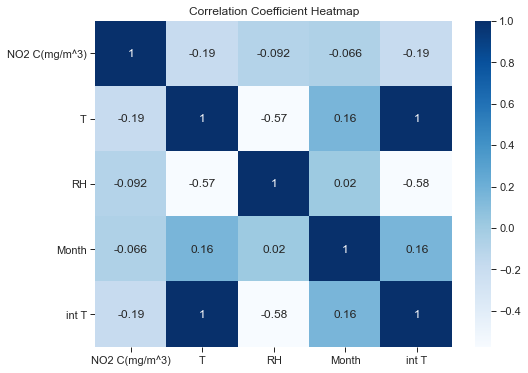

In [12]:
plt.figure(figsize=(8,6))
Air_mx = df4.corr()
sns.heatmap(Air_mx, annot=True, cmap='Blues').set(title='Correlation Coefficient Heatmap')

  In the correlation heatmap, the number in each square indicates the correlation between two variables, the number that is closer to 1, the higher possibility that these two variables forming a linear relationship. There are also some number are negative in this map, which means that as one of these variable getting larger, the other will become smaller.If the number is positive, then the variable will move into the same direction as another does. From here, it is easily discover that the correlation coefficient between temperature and NO2 concentration is only -0.19, which means the temperature is highly uncorrelated to the NO2 concentration. In addition, the correlation coefficient between NO2 concentration and Relative humidity(RH) is only -0.092. In this case, there are no linear relstionship among these variables. However, to ensure this conclusion is correct, it is necessary to create visulization between each environmental factor and NO2 concentration. Firstly, the relationship between temperature and NO2 concentration in air is checked by creating a barplot.

[Text(0.5, 0, 'Temperature (°C)'),
 Text(0, 0.5, 'NO2 concentration(mg/m³)'),
 Text(0.5, 1.0, 'Barplot for the NO2 concentration in various temperature conditions')]

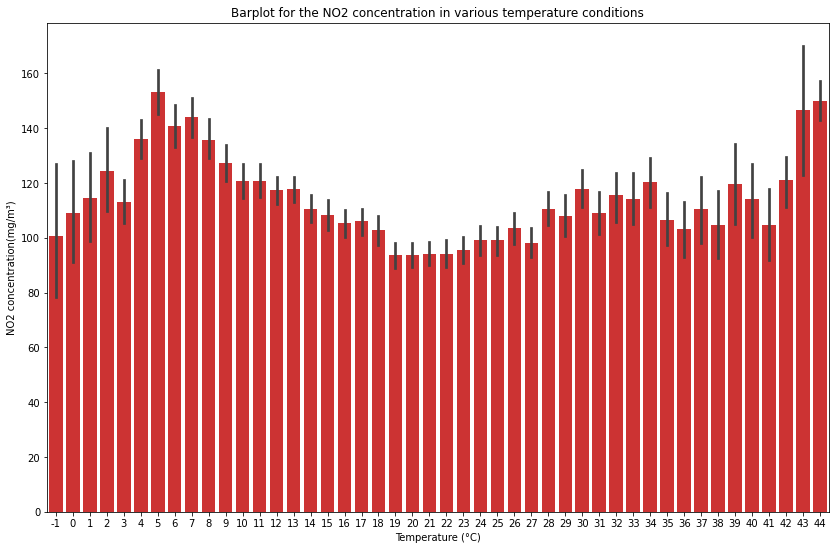

In [7]:
def catagorize(x):
    return int(x['T'])
df4.apply(catagorize,axis='columns')
df4['int T']=df4.apply(catagorize,axis='columns')
plt.figure(figsize=(14,9))
sns.barplot(x='int T',y='NO2 C(mg/m^3)',data=df4,color='red',saturation=0.6).set(xlabel='Temperature (°C)',ylabel='NO2 concentration(mg/m³)',
                                                                                   title='Barplot for the NO2 concentration in various temperature conditions')

To make the barplot looks neat, I define a method called "catagorize()" to convert all these temperature into integer type. These integer data are stored in a new column called "int T" in the dataframe. The barplot illustares the average NO2 concentration under various temperature.In this case, x axis is the temperature and y axis is the NO2 concentration in the air. From the barplot, although the NO2 concentrations from 15°C to 25°C are generally lower than other temperatures (this might be not applicable to to other cases). Therefore, a possible conclusion can be generated from this plot is that there is no relationship exists between temperature and NO2 concentration in air as the overall pattern of the barplot is irregular. Nevertheless, this conclusion may require further proof as temperatures in the barplot are meaeured in average of all observations in the same temperature (this might result in an conclusion that not accurate enough). In this case, a sctter plot with a linear trend line is presented here:

<Figure size 576x576 with 0 Axes>

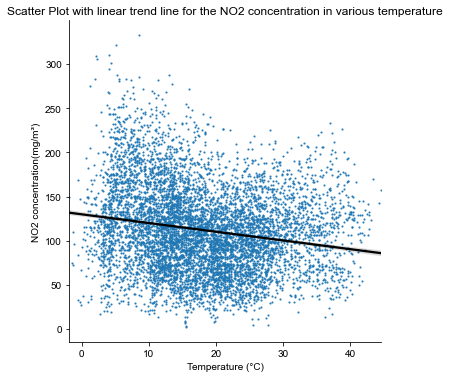

In [8]:
plt.figure(figsize=(8,8))
additional_plot= sns.lmplot(
data=df4,
x='T',y='NO2 C(mg/m^3)',height=5,markers='o',scatter_kws={"s": 1.5},line_kws={'color': 'black'}).set(
    xlabel='Temperature (°C)',ylabel='NO2 concentration(mg/m³)',title='Scatter Plot with linear trend line for the NO2 concentration in various temperature')
sns.set_theme(context='paper',style='ticks',font_scale=1.25)

In order to obtain a clear visualization, marker size has been reduced to avoid overplotting situation that result from too much observation in the dataset and the trend line that represent a negative linear relationship between temperature and NO2 concentration in air is in black. From the illustration, many points are densely disributed in the range from 0 to 200 mg/m³ of NO2 concentration in air for any temperature. In this case, although a linear trend line is given out, it is not fit into the model well, same thing also occur with a polynomial trend line situation. Therefore, we ensure that there is no relationship exist between temperature and NO2 concentration in air, which means that temperature is not one of the factor that affects the local NO2 concentration in air.

The next factor that being analyzed is the relative humidity, a scatter plot is created:

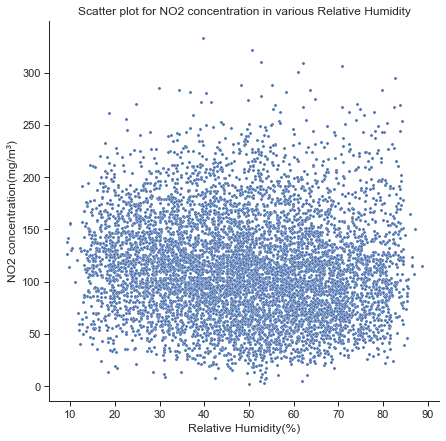

In [9]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='RH',y='NO2 C(mg/m^3)',data=df4,s=10).set(xlabel='Relative Humidity(%)',ylabel='NO2 concentration(mg/m³)',
                                                           title='Scatter plot for NO2 concentration in various Relative Humidity')
sns.despine()

Similar with the previous case, most of the NO2 concentration data points are distributed around 50 to 150 mg/m³ relate to the relative humidity. Combined with the conclusion from correlation coefficient heatmap, the correlation coefficient between relative humidity and NO2 concentration, so it is clear that a linear regression model is not fitted in this case. However, base on this irregular pattern of data points distribution, other types of trend line may also not fitted under this situation. Consequently, relative humidity is not an environmental factor influences the local NO2 concentration in air.

Based on the data analysis above, the local environment does not influences the local NO2 concentration in air so much. On the other hand, some other conclusions may canbe extracted from elements that beside environmental factor in this dataset. In this case, we mainly focus on time and month of the data recored, so another heatmap is generated:

[Text(0.5, 1.0, 'Heatmap of NO2 Concentration in Different Time and Month')]

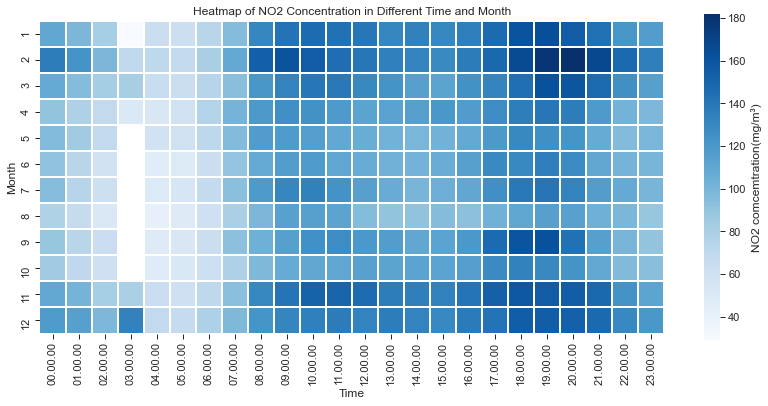

In [10]:
plt.figure(figsize=(14,6))
Nitrogen = df4.pivot_table(index='Month', columns='Time', values='NO2 C(mg/m^3)')
sns.heatmap(Nitrogen, cmap='Blues',square= True,linecolor='white',linewidth=1,cbar_kws={'label': 'NO2 comcemtration(mg/m³)'}).set(
title='Heatmap of NO2 Concentration in Different Time and Month')

In this heatmap, y-axis represents the Time and x-axis represents the Month that data are recorded, the brightness of each small squares indicates average NO2 concentration under various time in a specific month. From this heatmap, one notable point is that the average NO2 concentration in the period between 1am and 6am in all months are much lower than other time as those squares are much brighter (Note:Some data seems missing at 3 am for several months). One possible reason for that may be that huaman activities are largely reduced during this period as burning fossil fuel is one of the primary source of NO2, but this may need more evidences to prove it. Additionally, the concentration of NO2 from November to Feburary (winter season) seems higher than in other months.

In conclusion, after doing some analysis of tha dataset, the listed environment factors in the dataset (Temperature and Relative Humidity) do not affect the NO2 concentrtion. Nevertheless, there is a conclusion that a drop in NO2 concentration occurs in the early omring all the time and the concentration in winter seems higher compared to other months. The reason of occurrence of this phenomenon needed to be further explored.